In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading Library Inventory data

Library = pd.read_csv("D:\\DataScience\\PROJECT\\Library\\Library_Collection_Inventory.csv")
Library

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,09/01/2017,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,09/01/2017,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,09/01/2017,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,09/01/2017,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,09/01/2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687144,2744361,The hunter [sound recording] / John Lescroart.,"Lescroart, John T.","1611064066, 9781611064063",p2011.,"Brilliance Audio,","Private investigators Fiction, San Francisco C...",accd,nabocd,Floating,spa,10/01/2017,1
2687145,3161311,"The black moon : a novel of Cornwall, 1794-179...","Graham, Winston","0330463322, 9780330463324","2008, ©1973.","Pan,","Poldark Ross Fictitious character Fiction, Cor...",acbk,cafic,NaN,cen,10/01/2017,2
2687146,2932295,Ukraine / Andrew Evans ; updated by Massimilia...,"Evans, Andrew, 1975-","1841624500, 9781841624501",2013.,"Bradt Travel Guides,",Ukraine Guidebooks,acbk,nanf,NaN,cap,10/01/2017,1
2687147,1253883,Why the Confederacy lost / edited by Gabor S. ...,NaN,"019507405X, 0195085493",1992.,"Oxford University Press,","United States History Civil War 1861 1865, Con...",acbk,canf,NaN,cen,10/01/2017,1


In [3]:
# Grouping the items by BibNum and summing up the respective ItemCount

item_count = Library[["BibNum","ItemCount"]].groupby("BibNum").agg("sum")
item_count.reset_index()

,BibNum,ItemCount
0,4,2
1,7,2
2,12,2
3,21,2
4,24,2
...,...,...
584386,3304948,18
584387,3305392,4
584388,3305393,2
584389,3305394,1


In [4]:
# Dropping out irrelevant columns

Library = Library.iloc[:,[0,2,5,6,7,8]]

In [5]:
# Removing duplicate entries of BibNum

Library = Library.drop_duplicates(subset="BibNum")

In [6]:
# Performing left outer join b/w Library and item_count to append a column of item_count

Library = Library.merge(item_count, how="left", on="BibNum")

In [7]:
# Defining a function to create a bar chart

def barchart(x, y, xlabel, ylabel, title):
    plt.xticks(rotation="vertical")
    plt.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks([])
    plt.title(title)
    plt.show()

In [8]:
# Defining a function to display n top and bottom entities

def grouper(data, col1, col2, agg, num):
    groupedData = data[[col1, col2]].groupby(col1).agg(agg)
    
    tp_n = groupedData.nlargest(columns=col2, n=num)
    barchart(list(tp_n.index), tp_n[col2], col1, "Number of items", f"Top 10 {col1} by number of Items.")
    
    bt_n = groupedData.nsmallest(columns=col2, n=num)
    barchart(list(bt_n.index), bt_n[col2], col1, "Number of items", f"Bottom 10 {col1} by number of Items.")

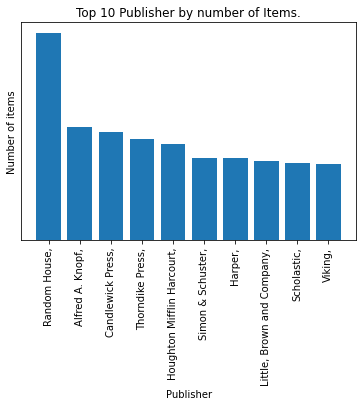

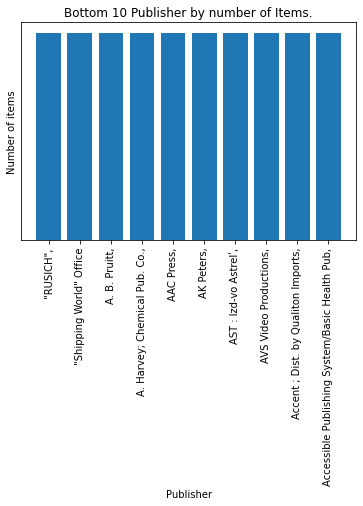

In [9]:
# Top and bottom 10 publishers by number of items in the Library

grouper(Library, "Publisher", "ItemCount", "sum", 10)

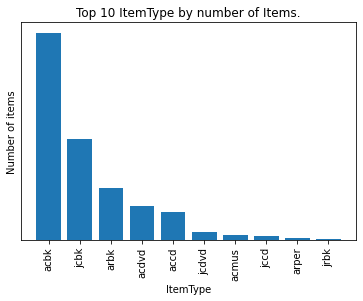

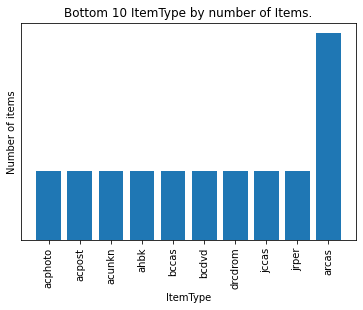

In [10]:
# Top and bottom 10 ItemType by number of items in the Library

grouper(Library, "ItemType", "ItemCount", "sum", 10)

In [11]:
subjects = []
for i in Library["Subjects"]:
    try:
        subjects += i.split(",")
    except: pass
subjects = pd.DataFrame({"Subject": subjects, "number":[i for i in range(len(subjects))]})

In [12]:
subjects

,Subject,number
0,Musicians Fiction,0
1,Bullfighters Fiction,1
2,Best friends Fiction,2
3,Friendship Fiction,3
4,Adventure and adventurers Fiction,4
...,...,...
1839202,Tennessee Genealogy Bibliography,1839202
1839203,Cats Juvenile fiction,1839203
1839204,Human animal relationships Juvenile fiction,1839204
1839205,Picture books for children,1839205


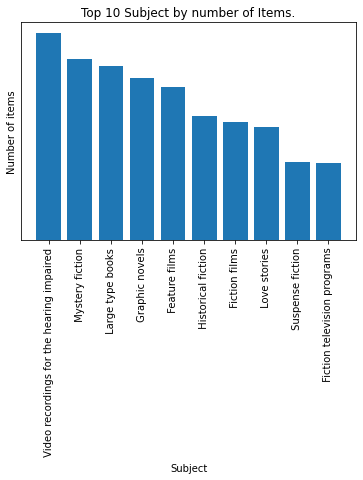

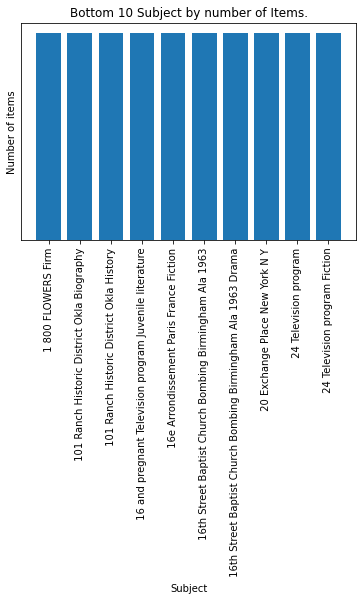

In [13]:
# Top and bottom 10 Subjects by number of items in the Library

grouper(subjects, "Subject", "number", "count", 10)

<h2>Checkout 2017

In [14]:
# Importing Checkout data 

checkout = pd.read_csv("D:\\DataScience\\PROJECT\\Library\\Checkouts_By_Title_Data_Lens_2017.csv")

In [15]:
# Converting Checkout dates and time to datetime format

checkout["CheckoutDateTime"] = pd.to_datetime(checkout["CheckoutDateTime"])

# Extracting date and month from checkout date and time

checkout['mm'] = checkout["CheckoutDateTime"].dt.month
checkout["date"] = checkout["CheckoutDateTime"].dt.date

In [16]:
checkout = checkout.iloc[:,[0,2,3,6,7]].merge(Library.iloc[:,:4], how="left", left_on="BibNumber", right_on="BibNum")
checkout

,BibNumber,ItemType,Collection,mm,date,BibNum,Author,Publisher,Subjects
0,2543647,accd,nacd,1,2017-01-02,2543647.0,"Cohen, Leonard, 1934-2016","Columbia/Legacy,",Popular music 1961 1970
1,3172300,acbk,namys,1,2017-01-02,3172300.0,"Cotterill, Colin","Soho Crime,",Paiboun Siri Doctor Fictitious character Ficti...
2,2393405,acbk,camys,1,2017-01-02,NaN,NaN,NaN,NaN
3,3199718,acdvd,nadvdnf,1,2017-01-02,3199718.0,NaN,"Film Movement/NuNoise Records,","Mardin Arif, Sound recording executives and pr..."
4,3211526,accd,nacd,1,2017-01-02,3211526.0,Shonen Knife (Musical group),"Good Charamel Records,","Rock music 2011 2020, Rock music Japan 2011 2020"
...,...,...,...,...,...,...,...,...,...
5034537,2661830,accd,nacd,10,2017-10-18,2661830.0,NaN,"Epic,","Popular music 2001 2010, World Cup Soccer Song..."
5034538,3208256,jcbk,cccomic,10,2017-10-18,3208256.0,"O'Neill, Katie (Cartoonist)","Oni Press, Inc.,","Princesses Comic books strips etc, Cartoons an..."
5034539,2831364,accd,cacd,10,2017-10-18,2831364.0,Matisyahu,"Fallen Sparks Records,","Reggae music, Popular music 2011 2020"
5034540,3282121,acdvd,nadvd,10,2017-10-18,3282121.0,NaN,"The Criterion Collection,","Women Drama, Sexism Drama, Women lawyers Drama..."


In [17]:
trend = checkout[["date", "BibNumber"]].groupby("date").agg("count")

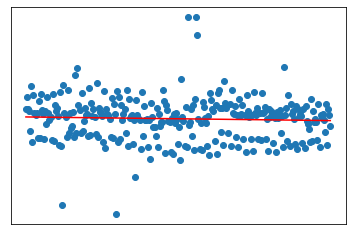

In [18]:
# Plotting checkouts with date in the year 2017
x = [i for i in range(len(trend))]
y = trend["BibNumber"]
plt.scatter(x, y)
plt.yticks([])
plt.xticks([])
plt.xticks(rotation="vertical")

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x, p(x), color="red")
plt.show()

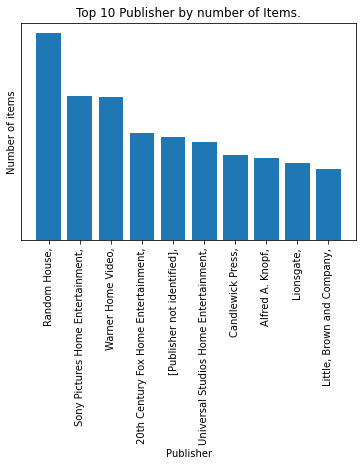

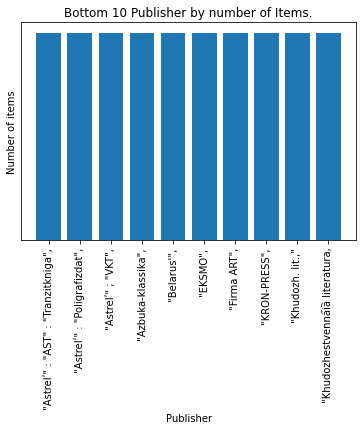

In [19]:
# Top and bottom 10 publishers by number of items in the Library

grouper(checkout, "Publisher", "BibNumber", "count", 10)

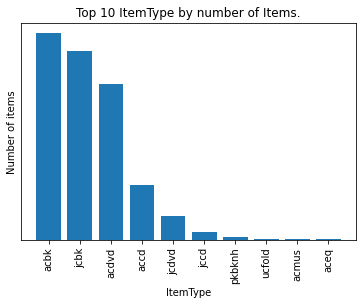

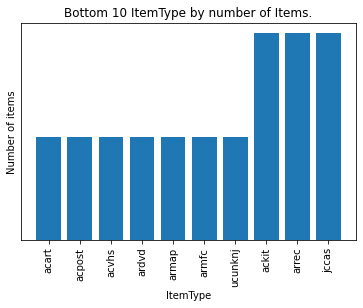

In [20]:
# Top and bottom 10 publishers by number of items in the Library

grouper(checkout, "ItemType", "BibNumber", "count", 10)

In [21]:
subjects = {}
for i in checkout["Subjects"]:
    try:
        for j in i.split(","):
            j = j.lower()
            if j not in subjects:
                subjects[j] = 1
            else:
                subjects[j]+=1
    except: pass

In [22]:
subjects = dict(sorted(subjects.items(), key = lambda kv:kv[1], reverse=True))

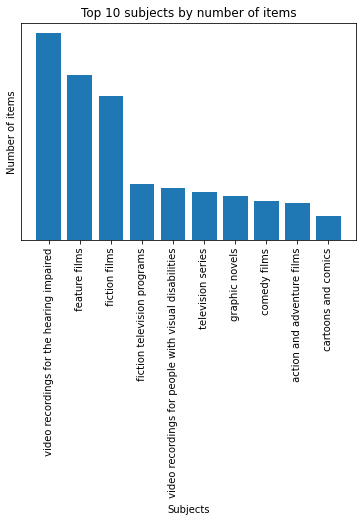

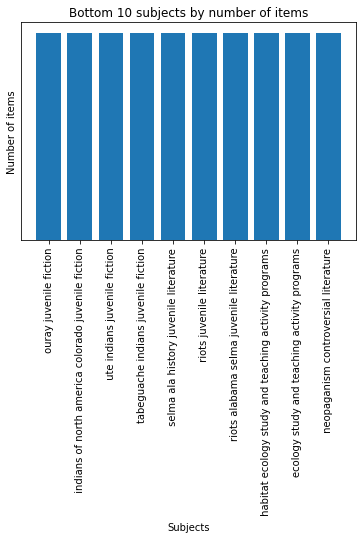

In [23]:
# Top and bottom 10 Subjects by number of items in the Library

x = list(subjects.keys())[:10]
y = list(subjects.values())[:10]
barchart(x, y, "Subjects", "Number of items", "Top 10 subjects by number of items")

x = list(subjects.keys())[-1:-11:-1]
y = list(subjects.values())[-1:-11:-1]
barchart(x, y, "Subjects", "Number of items", "Bottom 10 subjects by number of items")

### Insights

1. The quantity of the most checked out items should be increased.
2. There are some checkedout items which do not have any entry in library inventory.

In [24]:
def needs(data, col1, col2, agg, num):
    groupedData = data[[col1, col2]].groupby(col1).agg(agg)
    tp_n = groupedData.nlargest(columns=col2, n=num)
    return set(tp_n.index)

In [25]:
# Publishers among the top 10 whose quantites needs to be increased

list(needs(checkout, "Publisher", "BibNum", "count", 10) - needs(Library, "Publisher", "ItemCount", "sum", 10))

['Warner Home Video,',
 '[Publisher not identified],',
 'Lionsgate,',
 '20th Century Fox Home Entertainment,',
 'Sony Pictures Home Entertainment,',
 'Universal Studios Home Entertainment,']

In [26]:
# Item Type among the top 10 whose quantites needs to be increased

list(needs(checkout, "ItemType", "BibNum", "count", 10) - needs(Library, "ItemType", "ItemCount", "sum", 10))

['aceq', 'pkbknh', 'alaptop']